# Exploration towards Titanic Suvival Data

 **Abstract**: With the aim to answer what kind of attributes would increase a typical passengers' rate of survival on the Titanic, this report builds three parts to investigate the Titanic Survival Data, including data cleaning, exploration and drawing the conclusion. Combining the statistics and background knowledge of the accident, this report draws the conclusion that cabin class, sex, and age (children) are factors influenced a typical passenger's chance of survival. At the same time, it also illustrates in the fact that correlation does not imply causation. The conclusion from this report remains to be upgraded with further knowledge in data science.

## 1. Investigating the Data


In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

td=pd.read_csv('titanic_data.csv')
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


Here I attach a description towards the variables.

- survival:        Survival (0 = No; 1 = Yes)
- pclass:          Passenger Class (1 = 1st ~ Upper; 2 = 2nd ~ Middle; 3 = 3rd ~ Lower)
- name   :         Name
- sex     :        Sex
- age      :       Age
- sibsp     :      Number of Siblings/Spouses Aboard
- parch      :    Number of Parents/Children Aboard
- ticket      :    Ticket Number
- fare         :   Passenger Fare
- cabin         :  Cabin
- embarked       : Port of Embarkation  (C = Cherbourg; Q = Queenstown; S = Southampton)

For more illustration on the data, please visit [Kaggle](https://www.kaggle.com/c/titanic/data).

### 1.1 Investigating the missing values
With the following check, I find missing values in columns **"Age", "Cabin" and "Embarked"**. As a result, if I were to analyse these three factors later on, I would deal with the missing values then. However, using DataFrame.describe() would still be fine, because "describe( )" does not take into account of the missing values.

In [259]:
header = list(td.columns.values)

na_bool = [] # create a list
for x in header:
     na_bool.append(td[x].isnull().values.any())

isna=pd.DataFrame(na_bool, index=header, columns=['NAN_exist'])

print isna

            NAN_exist
PassengerId     False
Survived        False
Pclass          False
Name            False
Sex             False
Age              True
SibSp           False
Parch           False
Ticket          False
Fare            False
Cabin            True
Embarked         True


### 1.2 Describing data by group

In [102]:
# Split the data by group
survived_passengers = td[td['Survived']==1]
victim_passengers = td[td['Survived']==0]

print 'Total number of passengers on board: {}'.format(len(td))
print 'Number of passengers survived: {}'.format(len(survived_passengers))
print 'Number of passengers died: {}'.format(len(victim_passengers))

Total number of passengers on board: 891
Number of passengers survived: 342
Number of passengers died: 549


In [449]:
print survived_passengers.mean()

PassengerId    444.368421
Survived         1.000000
Pclass           1.950292
Age             28.343690
SibSp            0.473684
Parch            0.464912
Fare            48.395408
dtype: float64


In [450]:
print victim_passengers.mean()

PassengerId    447.016393
Survived         0.000000
Pclass           2.531876
Age             30.626179
SibSp            0.553734
Parch            0.329690
Fare            22.117887
dtype: float64


From the descriptive summary above, we can see that, on average, the survival group had higher class, younger age, less number of siblings/spouses and more parents/children on board, while they also spent more. The other variables the describe function failed to provide statistics are 'Sex', 'Cabin' and 'Embarked place'. 

In the next part, I will provide visualizations to analyse these factors, to infer which factors would increase a typical passenger's rate of survival.




## 2 What increased the rate of survival?

### 2.1 Passenger Class: the higher class, the greater chance of survival
Plotting the histogram of 'survived' and 'victim' in each class, it is immediately obvious that the passengers in the higher class had greater surviving rate. The survival rates are 63%, 47%, 24% in 1st, 2nd, and 3rd class respectively.


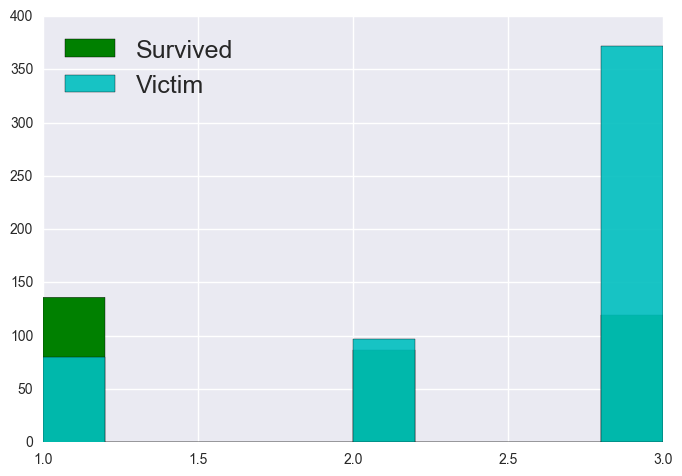

In [185]:
plt.hist(survived_passengers['Pclass'],label="Survived",color='g')
plt.hist(victim_passengers['Pclass'],label="Victim",color='c',alpha=0.9)
plt.legend(loc="best",prop={"size":18})
plt.show()

In [186]:
def pclass_survive_rate(s,v):
    for i in xrange(1,4):
        survive_rate=float(len(s[s['Pclass']==i]))/(len(s[s['Pclass']==i])+len(v[v['Pclass']==i]))
        print 'Survival rate in ' + str(i) + ' class is {}'.format('{:.1%}'.format(survive_rate))

pclass_survive_rate(survived_passengers, victim_passengers)     

Survival rate in 1 class is 63.0%
Survival rate in 2 class is 47.3%
Survival rate in 3 class is 24.2%


### 2.2 Ladies First: being a women would have greater chance to survive

Gouping by sex, I find: the sexual proportion of women to men is around "3:1" in the survived group, while it is "1:5.5" in the victim group. Being a woman would have **74.2%** of survival rate, while being a man only has **18.9%**.

In [451]:
survived_passengers.groupby('Sex').count()['PassengerId']

Sex
female    233
male      109
Name: PassengerId, dtype: int64

In [452]:
victim_passengers.groupby('Sex').count()['PassengerId']

Sex
female     81
male      468
Name: PassengerId, dtype: int64

If further breaking the data into "Passenger Class" and "Sex", it shows: only 3 females died in 1st-class, 6 females died in 2nd-class, while 72 females died in 3rd-class.

Noteworthy is, among the victims in 1st class, the gender ration of women to men is 3:77, while the ratio when embark was 94:122. This phenomenon also applies for the 2nd and 3rd classes. **It shows, men made women go first during the evacuation.**

In [453]:
victim_passengers.groupby(['Pclass','Sex']).count()['PassengerId']

Pclass  Sex   
1       female      3
        male       77
2       female      6
        male       91
3       female     72
        male      300
Name: PassengerId, dtype: int64

In [454]:
td.groupby(['Pclass','Sex']).count()['PassengerId']

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
Name: PassengerId, dtype: int64

### 2.3 Did age matter? Chilren got survived more.

In the last part, I found the different cabin and sex will influence the survival rate. These are categorical data. In this part, I want to explore the age variable, which is numerical. As discussed in 1.0, there exists null in variable "Age". So I strart by creating new dataframe free of nulls.

Then I stratified the passengers by age of 10-years old, i.e. [0, 10), [10, 20),..., [70, 80], and then calculate their survival rate and plot them.

In [412]:
td_age = td.dropna(subset=['Age'])
print 'Number of null values droped: {}'.format(len(td)-len(td_age))

td_age['Age'].describe()

Number of null values droped: 177


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

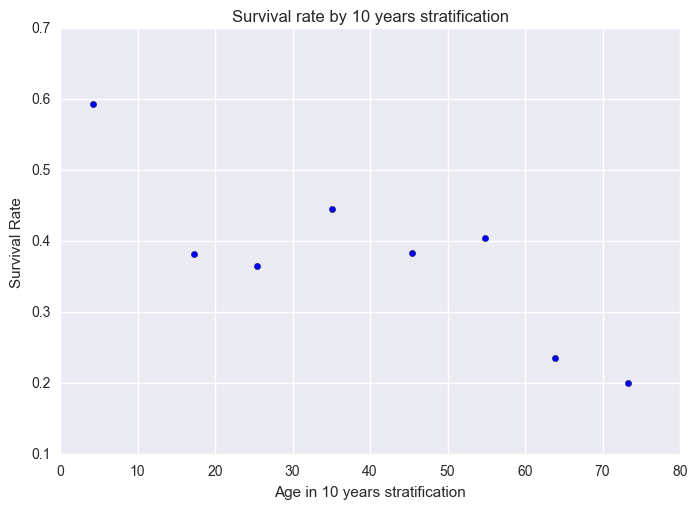

In [438]:
gb_age = td_age.groupby(pd.cut(td_age["Age"],np.arange(0,81,10)),as_index=False)
test = gb_age.mean()

plt.scatter(test['Age'],test['Survived'])

plt.xlabel('Age in 10 years stratification')
plt.ylabel('Survival Rate')
plt.title('Survival rate by 10 years stratification')

plt.show()

From the graph above, I find that the children group (below ten years old) has the highest rate of survival at around 60%. The middle groups whose age range in [10, 60) have survival rate at around 40%. The old groups aged above 60 have survival rate only at 20%. This result shows the passengers left the chance of survival to children.

### 2.4 The tragic family in first class
Here I am curious over the only three women victims in 1st class, so I print their information out. I found two of them are mother and baby with family name "Allison" and cabin. So I am curious of did the "father" survived. Surprisingly, I found the man alive. However, looking closer at the data "Age", I found he is actually an even younger baby. 

This result implies a family with only mother and children is rather vulnerable, despite it is discovered in above that being a first class passenger, female and children would contribute to a greater chance of survival.

In [439]:
vic = victim_passengers
vic[(vic['Sex']=='female') & (vic['Pclass']==1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50,0,0,PC 17595,28.7125,C49,C
297,298,0,1,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.5500,C22 C26,S
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500,C22 C26,S


In [440]:
td[td['Name'].str.contains("Allison")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.55,C22 C26,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.55,C22 C26,S
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.55,C22 C26,S


# 3 Conclusion

By the analysis above, it is found that being in a higher class, being a female or children will increase a passengers rate of survival. The high survival rate of women and children is interpretable by the maritime code of "[Women and children first"](https://en.wikipedia.org/wiki/Women_and_children_first). The comperatively higher rate of survival among the first and second class passengers may be due to the upper location of cabin compared to the third class, which gave the passengers more time to evacuate during the two-hours process of sinking. The following [graph](http://read.html5.qq.com/image?src=forum&q=5&r=0&imgflag=7&imageUrl=http://mmbiz.qpic.cn/mmbiz_jpg/G5sxAiadpFOcEQoOnmyiawsjpLPQldicUxEBMxqMiafWicnw8OLhsWv12wTm1yfmtpjlrHdexJT2Qtic1IT51t4jAPOA/0?wx_fmt=jpeg) shows the position of cabins on Titanic. 

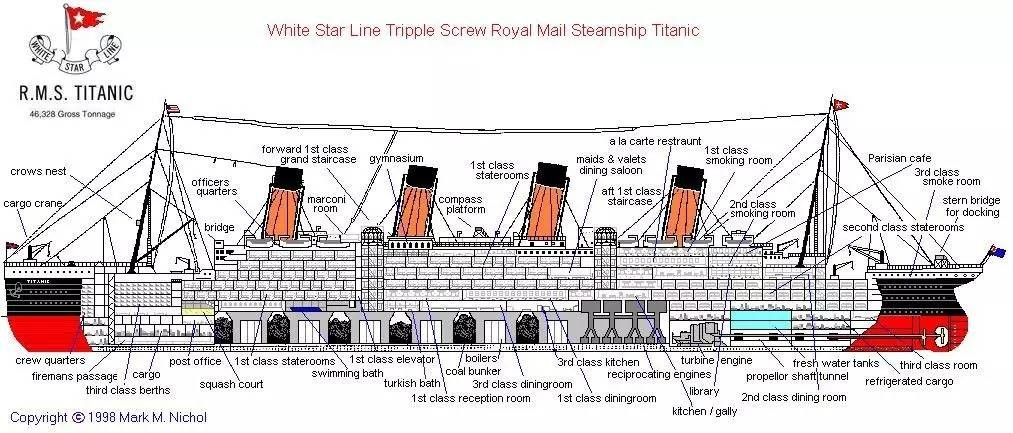

In [457]:
from IPython.display import Image
Image("titanic_image.jpeg")

Cabin class, sex, and age (children) are factors influnced a typical passengers chance of survival. One can not get such conclusion by simply calculating the statistics, but also she should refer to narratives or reports to know exactly what is the mechanism behind the statistics. This is because correlation does not imply causation.

For example, it can be found from the dataset that passengers embarked from Cherbourg had disctinctively greater survival rate. If creating the dummy, we would find 0.17 correlation coefficient for variable "embark from C" and "Survived". But with these, one can not draw a conclusion like "embarking from Cherbourg will increase a typical passenger's chance of survive". In fact, when looking closer at the data, it would be obvious that passengers embarked from Cherbourg are majorly the first class passengers. This makes the story go back to the version of higher location in the cabin and more time to evacute. Indeed, high correlation coefficient does not imply causation. To draw causation relation, analysts should investigate into the mechanism deep inside the data.

In [489]:
td.groupby(['Survived','Embarked']).count()['PassengerId']

Survived  Embarked
0         C            75
          Q            47
          S           427
1         C            93
          Q            30
          S           217
Name: PassengerId, dtype: int64

In [466]:
print 'Survival rate of passengers embarked by Cherbourg: {}'.format('{:.1%}'.format(93.0/(75+93)))
print 'Survival rate of passengers embarked by Queenstown: {}'.format('{:.1%}'.format(30.0/(47+30)))
print 'Survival rate of passengers embarked by Southampton: {}'.format('{:.1%}'.format(217.0/(427+217)))

Survival rate of passengers embarked by Cherbourg: 55.4%
Survival rate of passengers embarked by Queenstown: 39.0%
Survival rate of passengers embarked by Southampton: 33.7%


In [490]:
# Creating dummy for embarking ports to calcualte the correlation coefficients
b = td[['Survived','Embarked']]
b_ebk = pd.get_dummies(b['Embarked'])
b = b.join(b_ebk)
print b.corr()

          Survived         C         Q         S
Survived   1.00000  0.168240  0.003650 -0.155660
C          0.16824  1.000000 -0.148258 -0.778359
Q          0.00365 -0.148258  1.000000 -0.496624
S         -0.15566 -0.778359 -0.496624  1.000000


In [472]:
print td.groupby(['Embarked']).mean()[['Pclass','Fare']]

            Pclass       Fare
Embarked                     
C         1.886905  59.954144
Q         2.909091  13.276030
S         2.350932  27.079812


In [488]:
print td.groupby(['Embarked','Pclass']).count()['Survived']

Embarked  Pclass
C         1          85
          2          17
          3          66
Q         1           2
          2           3
          3          72
S         1         127
          2         164
          3         353
Name: Survived, dtype: int64
